### **How do solar system planets affect the orbit of the SpaceX Roadster over time?**

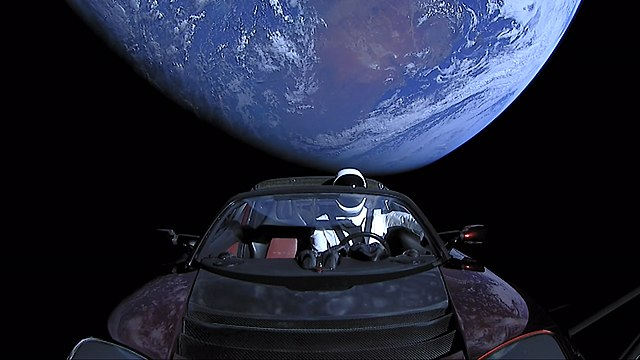

In [ ]:
pip install rebound

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.4/296.4 kB 11.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for rebound: filename=rebound-3.25.1-cp310-cp310-linux_x86_64.whl size=820904 sha256=def53a834226c61fe23d46d8c080ac78e3cf7e199024946b986c443f45c7649c
  Stored in directory: /root/.cache/pip/wheels/28/80/79/b128c11faa532053724e148b6b6ce3bb4f4e20c25e8593fae7
Successfully built rebound


In [ ]:
import rebound
import numpy as np
%matplotlib inline

In [ ]:
# Create a simulation including the Sun and all (8) planets.
sim = rebound.Simulation()
sim.add(["Sun","Mercury","Venus","Earth","Mars","Jupiter","Saturn","Uranus","Neptune"],date="2018-02-10 00:00")
sim.save("ss8.bin") #save simulation as bin file

In [ ]:
# Create a simulation including the Sun and all planets except Jupiter.
sim = rebound.Simulation()
sim.add(["Sun","Mercury","Venus","Earth","Mars","Saturn","Uranus","Neptune"],date="2018-02-10 00:00")
sim.save("ss_nojupiter.bin") #

In [ ]:
# Create a simulation including the Sun, Earth, and Jupiter.
sim = rebound.Simulation()
sim.add(["Sun","Earth","Jupiter"],date="2018-02-10 00:00")
sim.save("ss_onlyearthjupiter.bin")

In [ ]:
# Create a simulation including the Sun and all planets except Mars.
sim = rebound.Simulation()
sim.add(["Sun","Mercury","Venus","Earth","Jupiter","Saturn","Uranus","Neptune"],date="2018-02-10 00:00")
sim.save("ss_nomars.bin") #save simulation as bin file

Searching NASA Horizons for 'Sun'... 
Found: Sun (10) 
Searching NASA Horizons for 'Mercury'... 
Found: Mercury Barycenter (199) (chosen from query 'Mercury')
Searching NASA Horizons for 'Venus'... 
Found: Venus Barycenter (299) (chosen from query 'Venus')
Searching NASA Horizons for 'Earth'... 
Found: Earth-Moon Barycenter (3) (chosen from query 'Earth')
Searching NASA Horizons for 'Jupiter'... 
Found: Jupiter Barycenter (5) (chosen from query 'Jupiter')
Searching NASA Horizons for 'Saturn'... 
Found: Saturn Barycenter (6) (chosen from query 'Saturn')
Searching NASA Horizons for 'Uranus'... 
Found: Uranus Barycenter (7) (chosen from query 'Uranus')
Searching NASA Horizons for 'Neptune'... 
Found: Neptune Barycenter (8) (chosen from query 'Neptune')


In [ ]:
# Set the number of years to integrate in simulation:
years = 1000

In [ ]:
############################## SIMULATION #1 ##############################
sim = rebound.Simulation("ss8.bin")
sim.add("SpaceX Roadster")

# integrate
sim.dt = sim.particles[1].P/60. # small fraction of Mercury's period
sim.integrator = "mercurius"  # or "ias15"
N = 1000
times = np.linspace(0.,2.*np.pi*years,N)
a8 = np.zeros(N)
e8 = np.zeros(N)
for i,t in enumerate(times):
    sim.integrate(t,exact_finish_time=0)
    orbit = sim.particles[-1].calculate_orbit(primary=sim.particles[0])
    a8[i] = orbit.a

Searching NASA Horizons for 'SpaceX Roadster'... 
Found: SpaceX Roadster (spacecraft) (-143205) 


/usr/local/lib/python3.10/dist-packages/rebound/horizons.py:172: RuntimeWarning: Warning: Mass cannot be retrieved from NASA HORIZONS. Set to 0.
  warnings.warn("Warning: Mass cannot be retrieved from NASA HORIZONS. Set to 0.", RuntimeWarning)


In [ ]:
############################## SIMULATION #2 ##############################
sim = rebound.Simulation("ss_nojupiter.bin")
sim.add("SpaceX Roadster")

# integrate
sim.dt = sim.particles[1].P/60. # small fraction of Mercury's period
sim.integrator = "mercurius"  # or "ias15"
N = 1000
times = np.linspace(0.,2.*np.pi*years,N)
anj = np.zeros(N)

for i,t in enumerate(times):
    sim.integrate(t,exact_finish_time=0)
    orbit = sim.particles[-1].calculate_orbit(primary=sim.particles[0])
    anj[i] = orbit.a


Searching NASA Horizons for 'SpaceX Roadster'... 
Found: SpaceX Roadster (spacecraft) (-143205) 


Searching NASA Horizons for 'SpaceX Roadster'... 
Found: SpaceX Roadster (spacecraft) (-143205) 


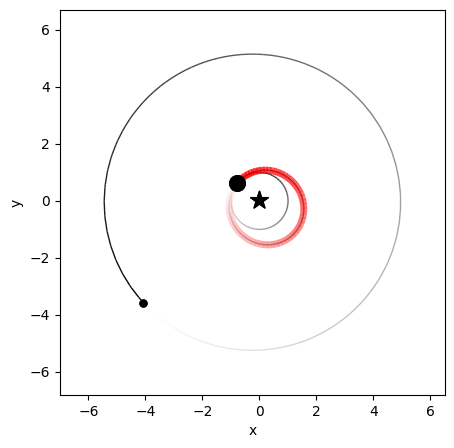

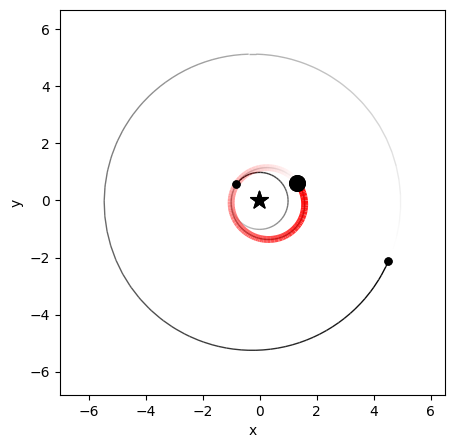

In [ ]:
############################## SIMULATION #3 ##############################
sim = rebound.Simulation("ss_onlyearthjupiter.bin")
sim.add("SpaceX Roadster")

sim.move_to_com()
op = rebound.OrbitPlot(sim)
opT = rebound.OrbitPlot(sim, particles=[-1], ax=op.ax, fig=op.fig, lw=5, color="red")


# integrate
sim.dt = sim.particles[1].P/60. # small fraction of Mercury's period
sim.integrator = "mercurius"  # or "ias15"
N = 1000
times = np.linspace(0.,2.*np.pi*years,N)
aoej = np.zeros(N)
for i,t in enumerate(times):
    sim.integrate(t,exact_finish_time=0)
    orbit = sim.particles[-1].calculate_orbit(primary=sim.particles[0])
    aoej[i] = orbit.a

sim.move_to_com()
op = rebound.OrbitPlot(sim)
opT = rebound.OrbitPlot(sim, particles=[-1], ax=op.ax, fig=op.fig, lw=5, color="red")


In [ ]:
############################## SIMULATION #4 ##############################
sim = rebound.Simulation("ss_nomars.bin")
sim.add("SpaceX Roadster")


# integrate
sim.dt = sim.particles[1].P/60. # small fraction of Mercury's period
sim.integrator = "mercurius"  # or "ias15"
N = 1000
times = np.linspace(0.,2.*np.pi*years,N)
anm = np.zeros(N)
for i,t in enumerate(times):
    sim.integrate(t,exact_finish_time=0)
    orbit = sim.particles[-1].calculate_orbit(primary=sim.particles[0])
    anm[i] = orbit.a


Searching NASA Horizons for 'SpaceX Roadster'... 
Found: SpaceX Roadster (spacecraft) (-143205) 


Un-comment the **plt.plot** commands below to see now various solar system configurations change the orbit size of the Roadster.

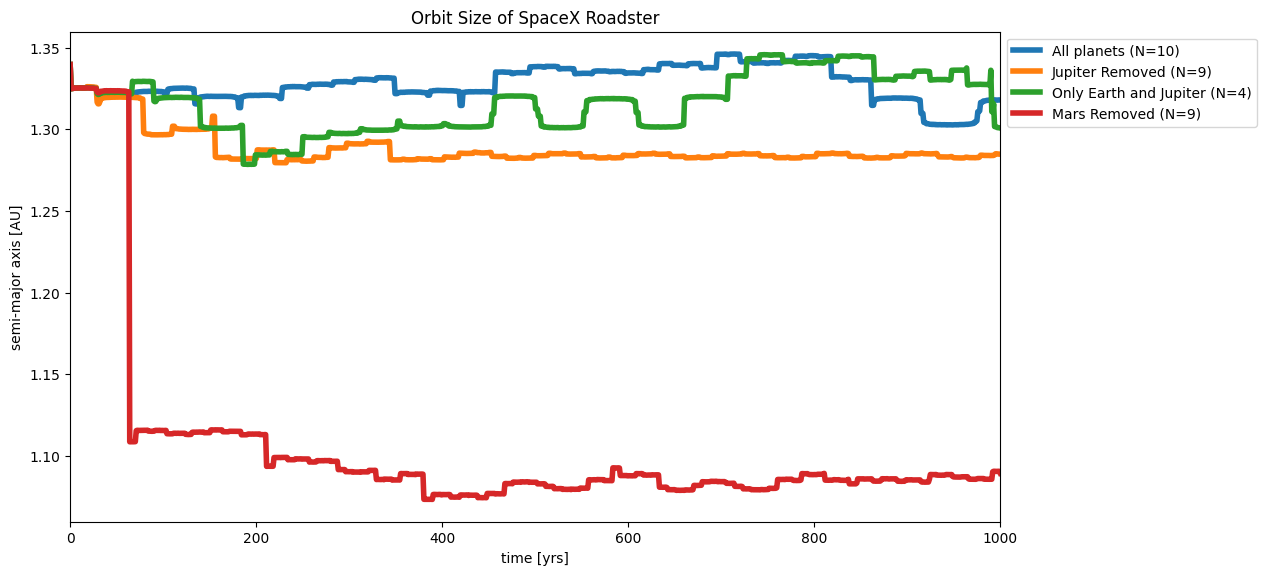

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,14))
ax = plt.subplot(211)
plt.title('Orbit Size of SpaceX Roadster')
ax.set_xlim([0,np.max(times)/2./np.pi])
ax.set_xlabel("time [yrs]")
ax.set_ylabel("semi-major axis [AU]")

plt.plot(times/2./np.pi,a8,label='All planets (N=10)',linewidth=4)
plt.plot(times/2./np.pi,anj,label='Jupiter Removed (N=9)',linewidth=4)
plt.plot(times/2./np.pi,aoej,label='Only Earth and Jupiter (N=4)',linewidth=4)
plt.plot(times/2./np.pi,anm,label='Mars Removed (N=9)',linewidth=4)


plt.legend(loc='upper right')
ax.legend(bbox_to_anchor=(1,1))